In [7]:
from sklearn.datasets import fetch_20newsgroups

categories = ["soc.religion.christian","comp.graphics"]

twenty_train = fetch_20newsgroups(subset="train",categories=categories,shuffle=True,random_state=42)
twenty_test = fetch_20newsgroups(subset="test",categories=categories,shuffle=True, random_state=42)

len(twenty_train.data),len(twenty_test.data)

(1183, 787)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer=RegexpTokenizer(r'\w+')

tf_idf_vect = TfidfVectorizer(lowercase=True, stop_words="english", ngram_range=(1,1),tokenizer=tokenizer.tokenize)

x_train_counts=tf_idf_vect.fit_transform(twenty_train.data)
x_train_counts.shape

c:\Users\udayp\miniconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1183, 22690)

In [9]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2).fit(x_train_counts)

pred_labels=kmeans.labels_
print("prediction labels:",pred_labels)

c:\Users\udayp\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


prediction labels: [1 1 1 ... 0 0 1]


In [10]:
from sklearn import metrics
dbi=metrics.davies_bouldin_score(x_train_counts.toarray(),pred_labels)

ss=metrics.silhouette_score(x_train_counts.toarray(), pred_labels, metric="euclidean")

print("DBI Score:",dbi,"\nSilhoutte Score: ", ss)

DBI Score: 9.909064017891486 
Silhoutte Score:  0.008305912746633193


In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

import matplotlib.pyplot as plt

def word_cloud(text, wc_title,wc_file_name='wordcloud.jpeg'):
    stopword_list = set(STOPWORDS)
    
    word_cloud = WordCloud(width = 800, height = 500, background_color="white",stopwords = stopword_list, min_font_size=14).generate(text)
    plt.figure(figsize=(8,6))
    plt.title(wc_title)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.savefig(wc_file_name,bbox_inches="tight")
    plt.show()

                                                   text  labels
0     From: mussack@austin.ibm.com (Christopher Muss...       1
1     From: greg@cs.uct.ac.za (Gregory Torrance)\nSu...       1
2     From: clldomps@cs.ruu.nl (Louis van Dompselaar...       1
3     From: jayne@mmalt.guild.org (Jayne Kulikauskas...       0
4     From: jack@shograf.com (Jack Ritter)\nSubject:...       1
...                                                 ...     ...
1178  From: ricky@watson.ibm.com (Rick Turner)\nSubj...       1
1179  From: stephen@mont.cs.missouri.edu (Stephen Mo...       0
1180  From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...       0
1181  From: hudson@athena.cs.uga.edu (Paul Hudson Jr...       0
1182  From: wijkstra@fwi.uva.nl (Marcel Wijkstra (AI...       1

[1183 rows x 2 columns]


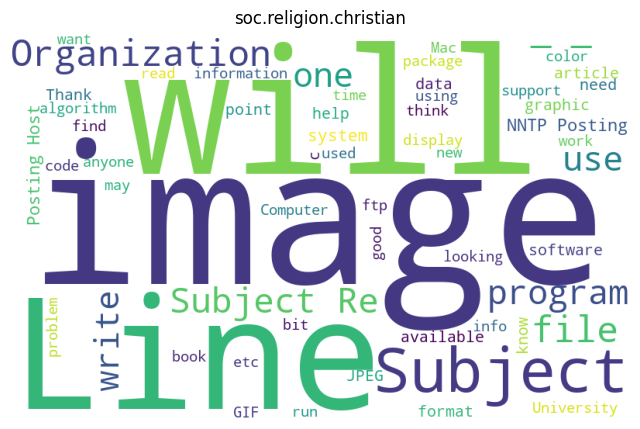

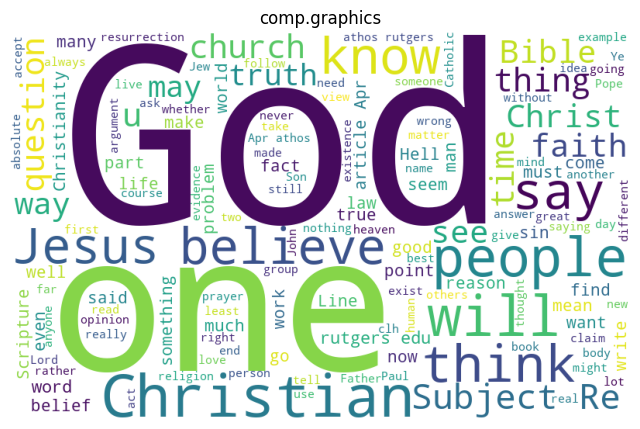

In [12]:
import pandas as pd
df=pd.DataFrame({"text":twenty_train.data,"labels":pred_labels})

print(df)

for i in df.labels.unique():
    new_df=df[df.labels==i]
    text="".join(new_df.text.tolist())
    word_cloud(text,twenty_train.target_names[i], twenty_train.target_names[i]+'.jpeg')